<a href="https://colab.research.google.com/github/Tmmfaris/TestGibTm/blob/main/Unsupervised_Casestudy(20_01_26).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

##Loading Dataset

In [3]:
# connecting out google drive onto the virtual machine
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
filepath = '/content/drive/MyDrive/DSA ICT Data Science/Data/CaseStudy/adult_dataset.csv'

adult_data = pd.read_csv(filepath)
print("Adult_data shape:", adult_data.shape)
adult_data.head()

Adult_data shape: (48842, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


##Data Inspection

In [5]:
adult_data.info()
adult_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46400 non-null  float64
 1   workclass       45480 non-null  object 
 2   fnlwgt          48842 non-null  int64  
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  int64  
 5   marital-status  48842 non-null  object 
 6   occupation      45485 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  int64  
 11  capital-loss    48842 non-null  int64  
 12  hours-per-week  46400 non-null  float64
 13  native-country  46137 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 5.6+ MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,46400.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,46400.000000
mean,38.679116,1.896641e+05,10.078089,1079.067626,87.502314,40.448599
std,13.952954,1.056040e+05,2.570973,7452.019058,403.004552,12.646992
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,255.000000,1.490400e+06,16.000000,99999.000000,4356.000000,250.000000


In [7]:
adult_data.isnull().sum()

,0
age,2442
workclass,3362
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,3357
relationship,0
race,0
sex,0


In [6]:
adult_data.nunique()

,0
age,82
workclass,9
fnlwgt,28523
education,16
education-num,16
marital-status,7
occupation,15
relationship,6
race,5
sex,2


In [8]:
#checking duplicated rows
adult_data.duplicated().sum()
#Removeing rows duplicates
adult_data.drop_duplicates(inplace= True)
adult_data.duplicated().sum()

np.int64(0)

##1. Data Preprocessing

In [9]:
# Replace '?' with NaN
adult_data.replace('?', np.nan, inplace=True)

In [10]:
# Separate categorical and numerical columns
categorical_cols = adult_data.select_dtypes(include='object').columns
numerical_cols = adult_data.select_dtypes(include=['int64', 'float64']).columns

In [11]:
# Fill missing values in categorical features using mode
for col in categorical_cols:
    adult_data[col] = adult_data[col].fillna(adult_data[col].mode()[0])

In [12]:
# Fill missing values in numerical features using median
for col in numerical_cols:
    adult_data[col] = adult_data[col].fillna(adult_data[col].median())

In [13]:
# Verify missing values
adult_data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [14]:
cat_cols = adult_data.select_dtypes(include='object').columns
cat_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [15]:
#Separating income (Income helps explain the clusters after they are formed.)
income_col = adult_data['income']
adult_data_features = adult_data.drop('income', axis=1)

In [17]:
cat_cols = adult_data_features.select_dtypes(include='object').columns
cat_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

###One-Hot Encoding

In [18]:
adult_data.shape

(48826, 15)

In [19]:
# One-hot encode categorical variables
adult_data_encoded = pd.get_dummies(
    adult_data,
    columns=categorical_cols,
    drop_first=True
)

# Check the new shape
print(adult_data_encoded.shape)

(48826, 100)


###Detect and treat outliers

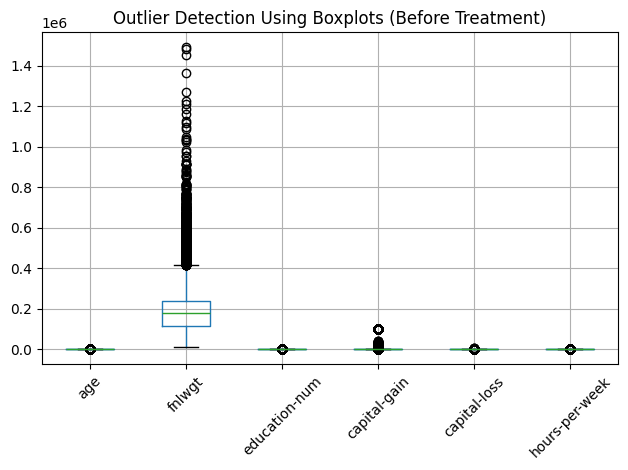

In [ ]:
adult_data[numerical_cols].boxplot(rot=45)
plt.title("Outlier Detection Using Boxplots (Before Treatment)")
plt.tight_layout()
plt.show()

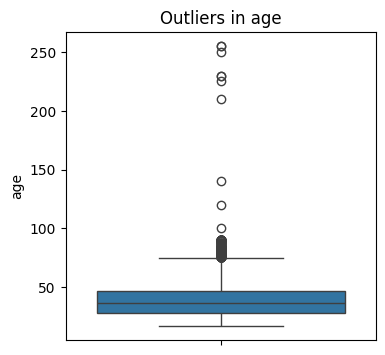

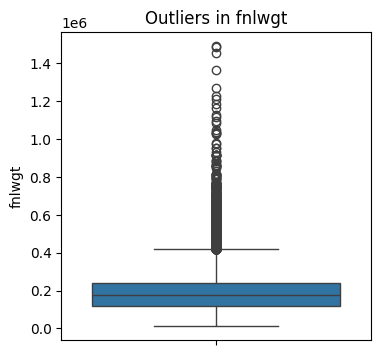

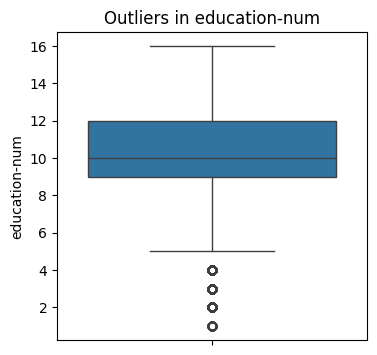

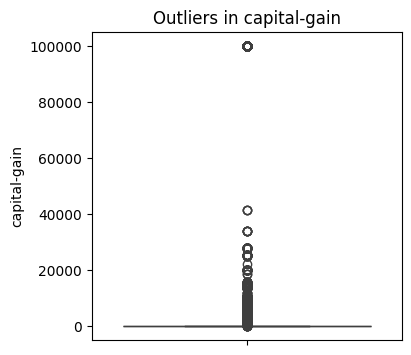

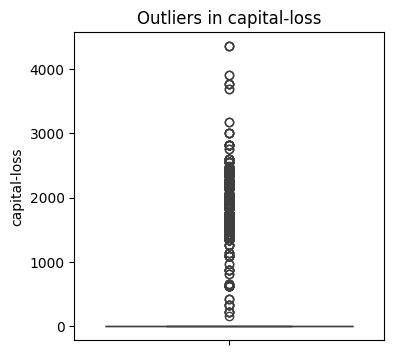

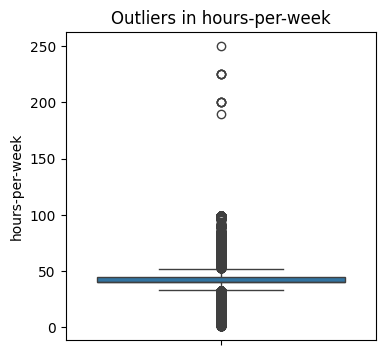

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(4, 4))
    sns.boxplot(y=adult_data[col])
    plt.title(f"Outliers in {col}")
    plt.show()

In [20]:
#Treating outliers using IQR
num_cols = adult_data_encoded.select_dtypes(include=['int64', 'float64']).columns
num_cols

for col in num_cols:
    Q1 = adult_data_encoded[col].quantile(0.25)
    Q3 = adult_data_encoded[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    adult_data_encoded[col] = adult_data_encoded[col].clip(lower, upper)

In [21]:
adult_data[numerical_cols].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48826.000000,4.882600e+04,48826.000000,48826.000000,48826.000000,48826.000000
mean,38.597428,1.896605e+05,10.078278,1079.421230,87.530988,40.428481
std,13.602653,1.056025e+05,2.570759,7453.214369,403.067466,12.326046
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376170e+05,12.000000,0.000000,0.000000,45.000000
max,255.000000,1.490400e+06,16.000000,99999.000000,4356.000000,250.000000


###Applying StandardScaler

In [22]:
scaler = StandardScaler()

adult_scaled = scaler.fit_transform(adult_data_encoded)

In [24]:
#Converting the scaled NumPy array back into a DataFrame with original column names

adult_scaled_df = pd.DataFrame(adult_scaled,columns=adult_data_encoded.columns)

In [25]:
adult_scaled_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K.,income_>50K,income_>50K.
count,4.882600e+04,4.882600e+04,4.882600e+04,48826.0,48826.0,4.882600e+04,4.882600e+04,4.882600e+04,4.882600e+04,4.882600e+04,...,4.882600e+04,4.882600e+04,4.882600e+04,4.882600e+04,4.882600e+04,4.882600e+04,4.882600e+04,48826.000000,4.882600e+04,4.882600e+04
mean,1.018678e-17,1.455255e-17,2.552517e-16,0.0,0.0,1.317006e-16,-1.309729e-18,-1.746306e-18,-9.168106e-17,-2.444828e-17,...,-2.954167e-17,-1.266072e-17,5.529968e-18,-5.384443e-18,1.103083e-16,5.675494e-18,1.848174e-17,0.000000,9.313631e-18,5.588179e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,0.0,0.0,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,...,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010,1.000010e+00,1.000010e+00
min,-1.622761e+00,-1.830509e+00,-2.288402e+00,0.0,0.0,-1.430414e+00,-2.546323e-01,-1.357800e-02,-1.802003e+00,-1.854867e-01,...,-4.664438e-02,-3.536802e-02,-2.437825e-02,-2.263370e-02,-3.367365e+00,-4.126510e-02,-2.170904e-02,-0.584398,-4.373944e-01,-2.924118e-01
25%,-7.938192e-01,-7.260914e-01,-4.567718e-01,0.0,0.0,-1.873705e-01,-2.546323e-01,-1.357800e-02,5.549379e-01,-1.854867e-01,...,-4.664438e-02,-3.536802e-02,-2.437825e-02,-2.263370e-02,2.969681e-01,-4.126510e-02,-2.170904e-02,-0.584398,-4.373944e-01,-2.924118e-01
50%,-1.155942e-01,-9.049283e-02,-4.974280e-02,0.0,0.0,-1.873705e-01,-2.546323e-01,-1.357800e-02,5.549379e-01,-1.854867e-01,...,-4.664438e-02,-3.536802e-02,-2.437825e-02,-2.263370e-02,2.969681e-01,-4.126510e-02,-2.170904e-02,-0.584398,-4.373944e-01,-2.924118e-01
75%,6.379893e-01,5.335128e-01,7.643152e-01,0.0,0.0,6.413250e-01,-2.546323e-01,-1.357800e-02,5.549379e-01,-1.854867e-01,...,-4.664438e-02,-3.536802e-02,-2.437825e-02,-2.263370e-02,2.969681e-01,-4.126510e-02,-2.170904e-02,1.711163,-4.373944e-01,-2.924118e-01
max,2.785702e+00,2.422919e+00,2.392431e+00,0.0,0.0,1.884368e+00,3.927231e+00,7.364856e+01,5.549379e-01,5.391222e+00,...,2.143881e+01,2.827413e+01,4.102018e+01,4.418190e+01,2.969681e-01,2.423355e+01,4.606376e+01,1.711163,2.286266e+00,3.419834e+00


##2. Exploratory Analysis

Distribution of Numerical Features (Histograms)

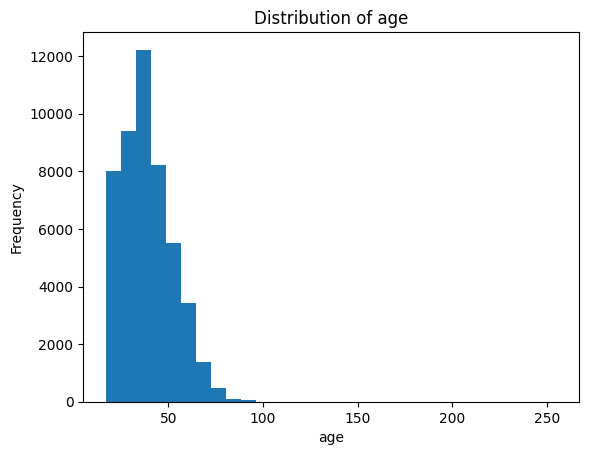

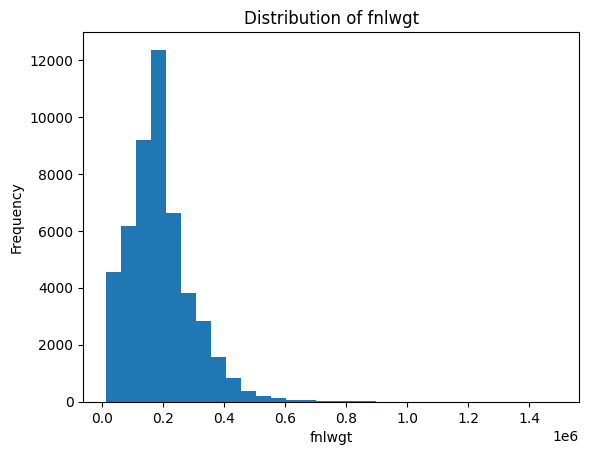

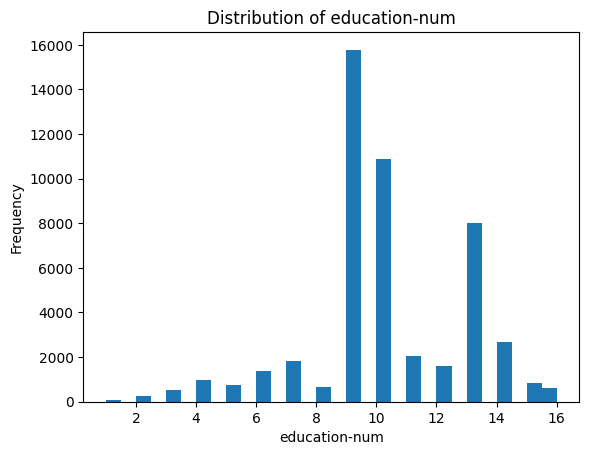

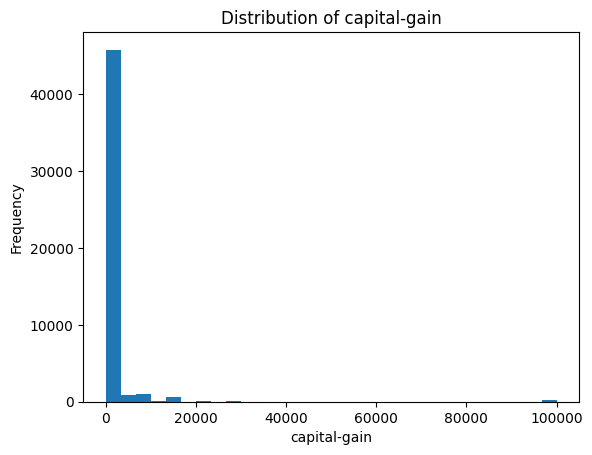

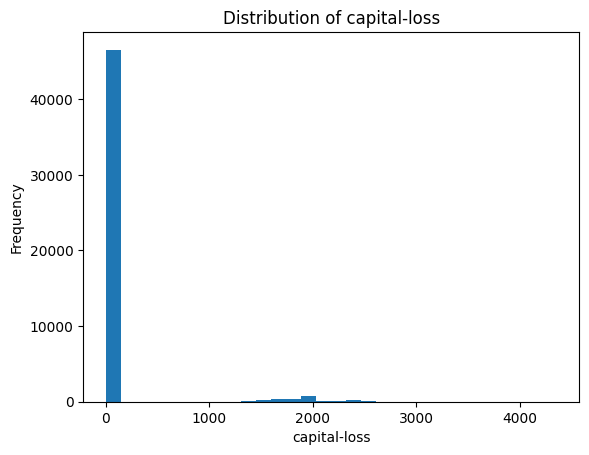

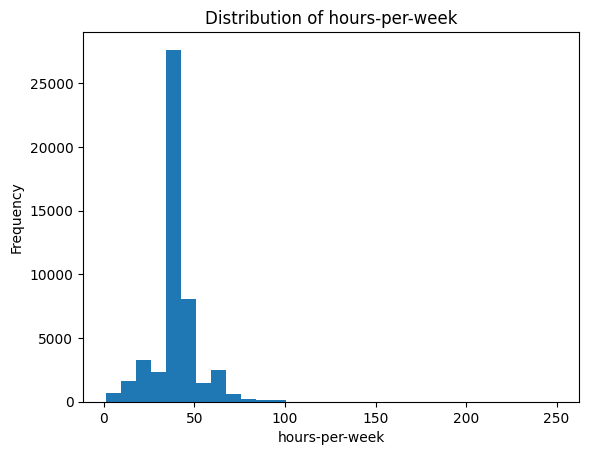

In [26]:
num_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

for col in num_cols:
    plt.figure()
    plt.hist(adult_data[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Analyzing correlations between variables

In [27]:
corr_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

corr_matrix = adult_data[corr_cols].corr()
corr_matrix

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.073941,0.029412,0.073561,0.056227,0.098979
fnlwgt,-0.073941,1.000000,-0.038681,-0.003702,-0.004359,-0.011041
education-num,0.029412,-0.038681,1.000000,0.125167,0.080977,0.136140
capital-gain,0.073561,-0.003702,0.125167,1.000000,-0.031451,0.079852
capital-loss,0.056227,-0.004359,0.080977,-0.031451,1.000000,0.050909
hours-per-week,0.098979,-0.011041,0.136140,0.079852,0.050909,1.000000


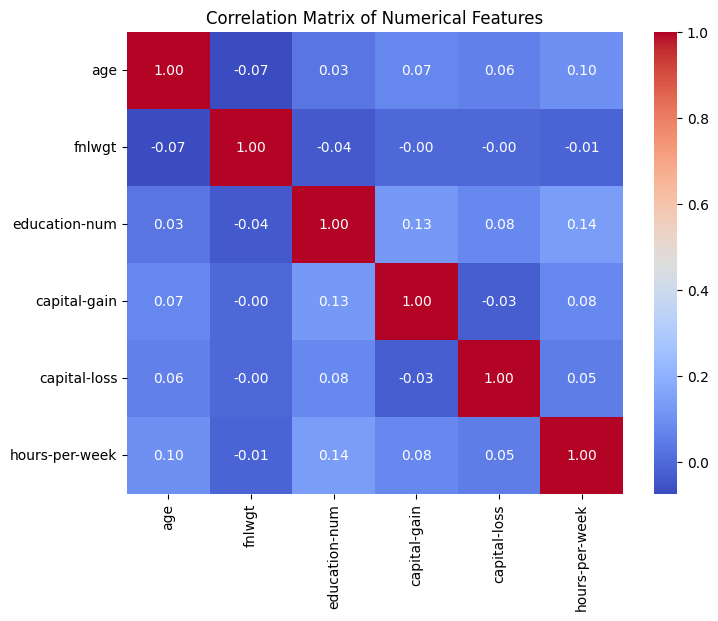

In [28]:
#Visualizing using heatmap

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Fitting PCA on scaled data

In [29]:
pca = PCA()
pca.fit(adult_scaled_df)

PCA()

In [30]:
#Explained variance ratio
pca.explained_variance_ratio_

array([3.81878215e-02, 2.70013346e-02, 2.57367645e-02, 2.09641483e-02,
       1.86462248e-02, 1.76370867e-02, 1.59994133e-02, 1.54202935e-02,
       1.44248302e-02, 1.33501441e-02, 1.31410066e-02, 1.27414635e-02,
       1.23680248e-02, 1.22081773e-02, 1.19543521e-02, 1.18487056e-02,
       1.17147842e-02, 1.15561699e-02, 1.14517008e-02, 1.13527567e-02,
       1.11982309e-02, 1.11207284e-02, 1.10765547e-02, 1.09738150e-02,
       1.09361682e-02, 1.08703029e-02, 1.08391603e-02, 1.08159174e-02,
       1.07172054e-02, 1.06696165e-02, 1.06259682e-02, 1.05561584e-02,
       1.05095510e-02, 1.04642954e-02, 1.04186238e-02, 1.03962841e-02,
       1.03393104e-02, 1.02978284e-02, 1.02766182e-02, 1.02652644e-02,
       1.02480249e-02, 1.02360466e-02, 1.02272651e-02, 1.02218031e-02,
       1.02194894e-02, 1.02175468e-02, 1.02133535e-02, 1.02119652e-02,
       1.02095135e-02, 1.02081952e-02, 1.02023763e-02, 1.01927505e-02,
       1.01899790e-02, 1.01798454e-02, 1.01775822e-02, 1.01588851e-02,
      

In [31]:
#Cumulative explained variance

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.03818782, 0.06518916, 0.09092592, 0.11189007, 0.13053629,
       0.14817338, 0.16417279, 0.17959309, 0.19401792, 0.20736806,
       0.22050907, 0.23325053, 0.24561856, 0.25782673, 0.26978109,
       0.28162979, 0.29334458, 0.30490075, 0.31635245, 0.3277052 ,
       0.33890343, 0.35002416, 0.36110072, 0.37207453, 0.3830107 ,
       0.393881  , 0.40472016, 0.41553608, 0.42625329, 0.4369229 ,
       0.44754887, 0.45810503, 0.46861458, 0.47907888, 0.4894975 ,
       0.49989378, 0.51023309, 0.52053092, 0.53080754, 0.54107281,
       0.55132083, 0.56155688, 0.57178414, 0.58200594, 0.59222543,
       0.60244298, 0.61265633, 0.6228683 , 0.63307781, 0.64328601,
       0.65348838, 0.66368114, 0.67387111, 0.68405096, 0.69422854,
       0.70438743, 0.71453887, 0.72464326, 0.73472462, 0.74478882,
       0.75483677, 0.76487158, 0.77486214, 0.78482649, 0.79474465,
       0.8046298 , 0.81448589, 0.82428926, 0.8340639 , 0.84381672,
       0.85343773, 0.86297971, 0.8724421 , 0.88181617, 0.89116

In [32]:
#reduce to 2 components for visualization
pca_2d = PCA(n_components=2)
pca_result = pca_2d.fit_transform(adult_scaled_df)

#Create DataFrame:
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

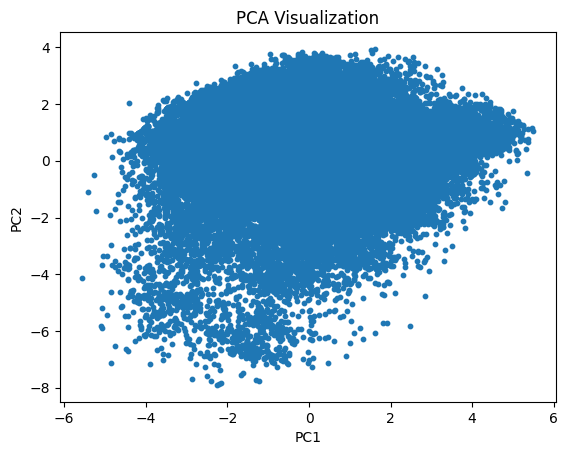

In [33]:
#Plot PCA Visualization
plt.figure()
plt.scatter(pca_df['PC1'], pca_df['PC2'], s=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization')
plt.show()

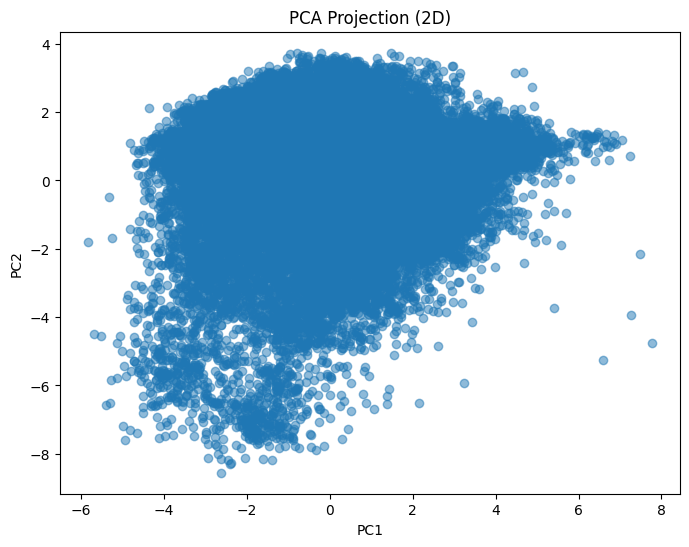

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.5)
plt.title("PCA Projection (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

##3. Clustering

Apply clustering algorithms

In [34]:
#KMeans

inertia = []

K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(adult_scaled_df)
    inertia.append(kmeans.inertia_)

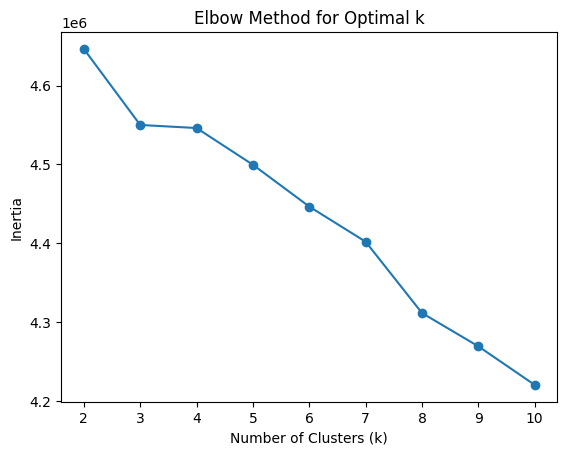

In [35]:
#Ploting elbow curve

plt.figure()
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [36]:
#silhouette scores
sample_df = adult_scaled_df.sample(n=10000, random_state=42)

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(sample_df)
    score = silhouette_score(sample_df, labels)
    silhouette_scores.append(score)

silhouette_scores

[np.float64(0.07967340420365844),
 np.float64(0.05329222855161645),
 np.float64(0.053997394935985835),
 np.float64(0.05554083177053178),
 np.float64(0.05439027033695045),
 np.float64(0.055334627274499004),
 np.float64(0.052867558944098586),
 np.float64(0.05364777454334222),
 np.float64(0.055784471089621354)]

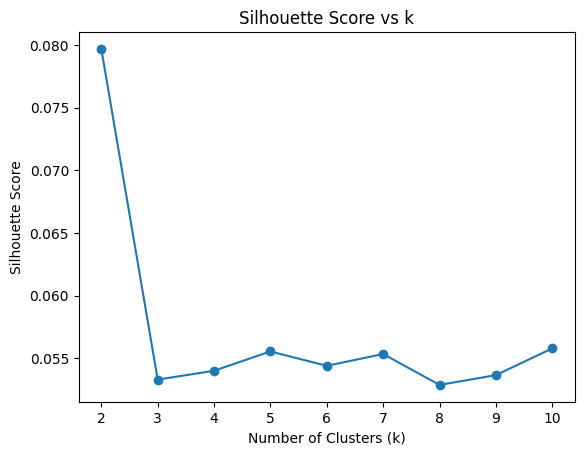

In [37]:
plt.figure()
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.show()

In [39]:
#Final KMeans clustering

from sklearn.cluster import KMeans

kmeans_final = KMeans(n_clusters=7, random_state=42)
clusters = kmeans_final.fit_predict(adult_scaled_df)

adult_scaled_df['Cluster'] = clusters
adult_data["Cluster"] = clusters

In [40]:
#Crosstab (Cluster vs Income)
pd.crosstab(adult_data["Cluster"], adult_data["income"])

income,<=50K,<=50K.,>50K,>50K.
Cluster,,,,
0,981,492,343,153
1,418,227,202,91
2,7059,3432,2947,1400
3,14027,7319,292,143
4,2112,907,4021,2046
5,45,20,12,5
6,67,33,24,8


In [41]:
#Crosstab (Cluster vs Sex)
pd.crosstab(adult_data["Cluster"], adult_data["sex"])

sex,Female,Male
Cluster,,
0,722,1247
1,118,820
2,1611,13227
3,11926,9855
4,1738,7348
5,23,59
6,47,85


In [42]:
pd.crosstab(adult_data["Cluster"],adult_data["income"],normalize="index") * 100

income,<=50K,<=50K.,>50K,>50K.
Cluster,,,,
0,49.822245,24.987303,17.420010,7.770442
1,44.562900,24.200426,21.535181,9.701493
2,47.573797,23.129802,19.861167,9.435234
3,64.400165,33.602681,1.340618,0.656536
4,23.244552,9.982390,44.254898,22.518160
5,54.878049,24.390244,14.634146,6.097561
6,50.757576,25.000000,18.181818,6.060606


##Agglomerative Clustering

In [43]:
adult_scaled_sample = adult_scaled_df.drop("Cluster", axis=1).sample(n=10000,random_state=42)

agglo_model = AgglomerativeClustering(n_clusters=4,linkage="ward")

agglo_sample_labels = agglo_model.fit_predict(adult_scaled_sample)

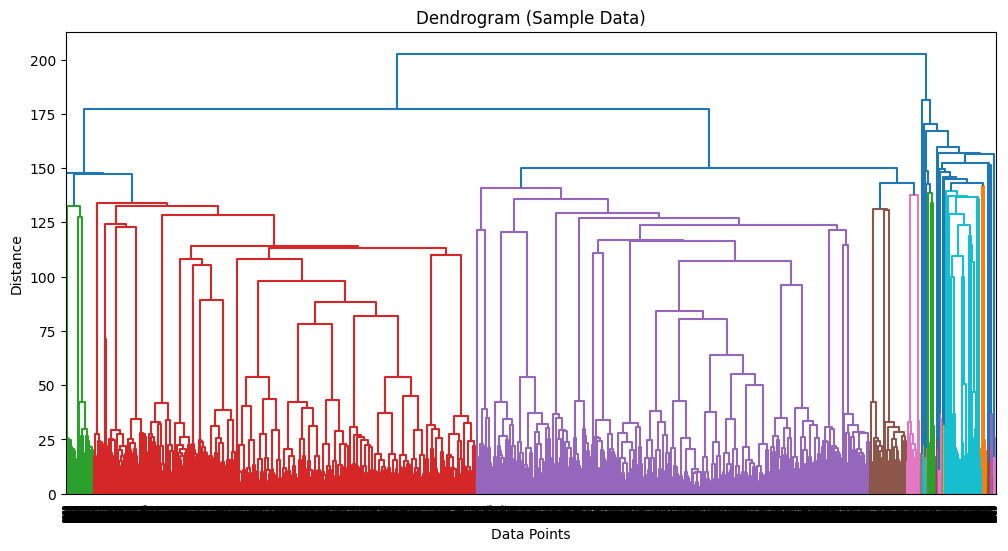

In [44]:
#Dendogram

linked = linkage(adult_scaled_sample, method="ward")

plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title("Dendrogram (Sample Data)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()